In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

c:\Users\Aspire_Lays\anaconda3\envs\ai\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Normalize the data to [0, 1]
X = X / 255.0  # MNIST pixel values range from 0 to 255

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Train an SVM model
svm_model = svm.SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

In [4]:
# Evaluate on clean test data
baseline_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
print(f"Baseline Accuracy on Clean Test Data: {baseline_accuracy:.4f}")

Baseline Accuracy on Clean Test Data: 0.9764


In [5]:
# Function to create adversarial examples by adding Gaussian noise
def add_gaussian_noise(images, noise_factor):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0, 1)  # Ensure pixel values remain in [0, 1]

In [6]:
# Generate adversarial examples
noise_factor = 0.3  # Adjust this for more or less perturbation
X_test_adv = add_gaussian_noise(X_test, noise_factor)

In [7]:
# Evaluate the model on adversarial examples
adv_predictions = svm_model.predict(X_test_adv)
adv_accuracy = accuracy_score(y_test, adv_predictions)
print(f"Accuracy after Gaussian Noise Attack: {adv_accuracy:.4f}")

Accuracy after Gaussian Noise Attack: 0.8694


Original shape: (14000, 784), Adversarial shape: (14000, 784)


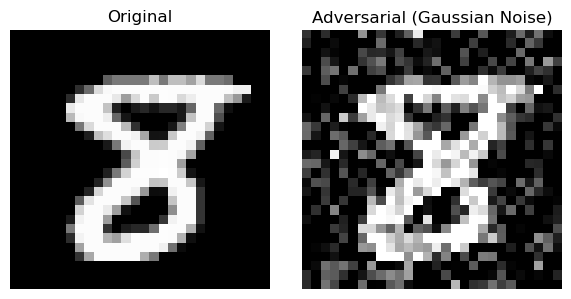

In [42]:
def visualize_images(original, adversarial, index):
    # Check the shape of the original and adversarial images
    print(f"Original shape: {original.shape}, Adversarial shape: {adversarial.shape}")

    # Ensure index is within bounds
    if index < 0 or index >= original.shape[0]:
        print(f"Index {index} is out of bounds for the original images.")
        return

    plt.figure(figsize=(6, 3))
    
    # Original Image
    plt.subplot(1, 2, 1)
    org_arr = original.values
    plt.imshow(org_arr[index].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # Adversarial Image
    plt.subplot(1, 2, 2)
    adv_arr = adversarial.values
    plt.imshow(adv_arr[index].reshape(28, 28), cmap='gray')
    plt.title("Adversarial (Gaussian Noise)")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize the first image from the test set
index = 0
visualize_images(X_test, X_test_adv, index)

In [39]:
arrs = X.values
arrs[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

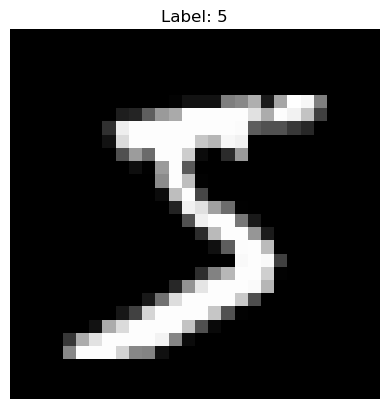

In [41]:
# Reshape the selected image to 28x28
arr_image = X.values
image = arr_image[0].reshape(28,28)
# Visualize the image using imshow
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y[index]}")
plt.axis('off')  # Hide axis
plt.show()